## Part 1

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [2]:
#run parameters 

# Parameters from the previous graph
N = 100  # Population size
x = 1    # number of mutants
s = 0.1  # Selective advantage
m = 0.001  # Mutation prob
n = 0.001  # Normalization prob
p0 = 0.01 # Starting frequency of the allele
T = 120  # Number of generations

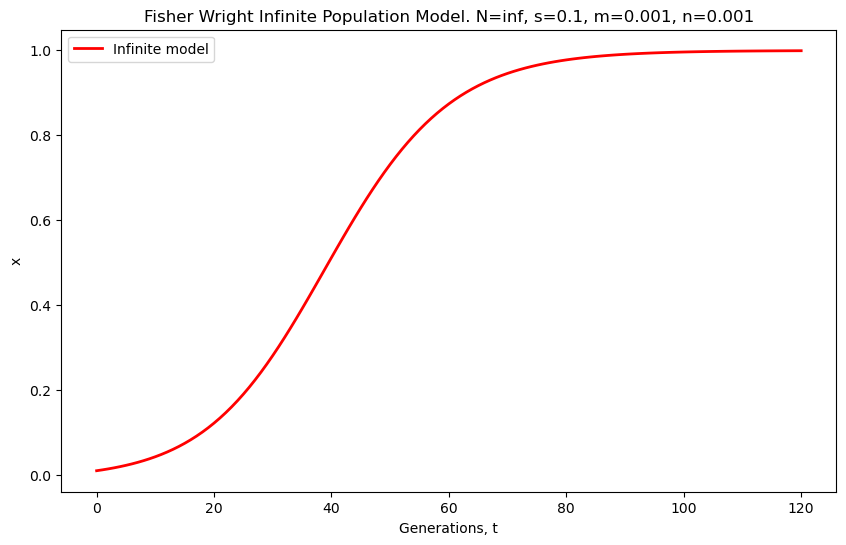

In [3]:


# Redefine the differential equation / model function based on the provided equation
def fisher_wright_infinite(p, t, s, m, n):
    dpdt = (p * (s - n - m * s) + m - s * p**2) / (1 + s * p)
    return dpdt

# Time points at which to compute the solution
t = np.linspace(0, T, T+1)

# Solve the differential equation for the infinite model using the provided equation
p_infinite = odeint(fisher_wright_infinite, p0, t, args=(s, m, n))

# Plotting the results for the infinite model
plt.figure(figsize=(10, 6))

# Plot the deterministic trajectory for the infinite population model using the provided equation
plt.plot(t, p_infinite, label='Infinite model', color='red', linewidth=2)

# Add title and labels
plt.title(f'Fisher Wright Infinite Population Model. N=inf, s={s}, m={m}, n={n}')
plt.xlabel('Generations, t')
plt.ylabel('x')
plt.legend()
plt.show()



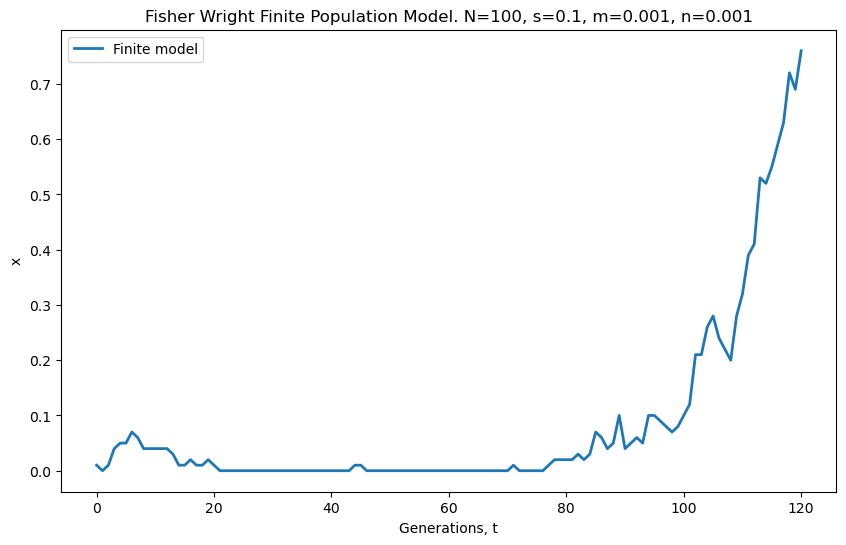

In [4]:
import numpy as np

def fisher_wright_finite(N, x, s, m, n, T):
    # Initialize the array to store the number of mutants at each time step
    mut_arr = np.zeros(T+1, dtype=int)
    mut_arr[0] = x  # Set the initial number of mutants
    
    # Simulate the Fisher Wright Model over T generations
    for t in range(1, T + 1):
        # Calculate the probability of selection and mutation
        psm = (1 - n) * (1 + s) * x / (N + s * x) + m * (N - x) / (N + s * x)
        
        # Update the number of mutants using binomial sampling
        x = np.random.binomial(N, psm)
        
        # Store the number of mutants for this generation
        mut_arr[t] = x
    
    return mut_arr

# Run the simulation
mut_arr = fisher_wright_finite(N, x, s, m, n, T)

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(range(T+1), mut_arr/N, label='Finite model', linewidth=2)
plt.title(f'Fisher Wright Finite Population Model. N={N}, s={s}, m={m}, n={n}')
plt.xlabel('Generations, t')
plt.ylabel('x')
plt.legend()
plt.show()


Each run of simulation yields different results because of the stochastic nature. 

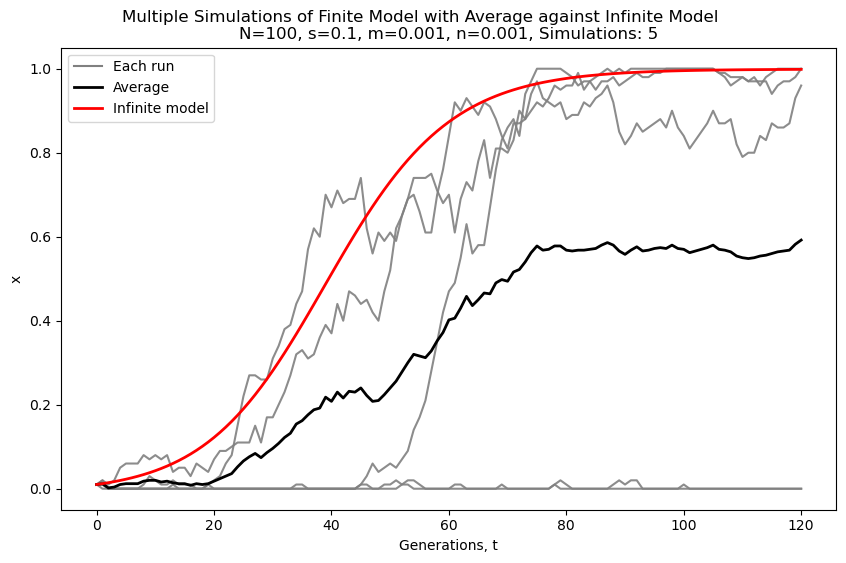

In [5]:
# Set the number of simulations
num_sims = 5

# Initialize an array to store the number of mutants for all simulations
all_sims = np.zeros((num_sims, T+1), dtype=int)

# Run the simulations
for sim in range(num_sims):
    all_sims[sim] = fisher_wright_finite(N, x, s, m, n, T)

# Time points at which to compute the solution
t = np.linspace(0, T, T+1)

p_infinite = odeint(fisher_wright_infinite, p0, t, args=(s, m, n))


# Calculate the average number of mutants at each generation
average_mutants = np.mean(all_sims, axis=0)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot each simulation
for sim in range(num_sims):
    plt.plot(range(T+1), all_sims[sim] / N, color='grey',alpha=0.9)

#dummy label 
plt.plot([], [], label='Each run', color='grey')

# Plot the average trajectory
plt.plot(range(T+1), average_mutants / N, label='Average', color='black', linewidth=2)

#p_infinite MAKE SURE PARAMETERS ARE THE SAME
plt.plot(t, p_infinite, label='Infinite model', color='red', linewidth=2)


# Add title and labels
plt.title(f'Multiple Simulations of Finite Model with Average against Infinite Model \
          \nN={N}, s={s}, m={m}, n={n}, Simulations: {num_sims}')

plt.xlabel('Generations, t')
plt.ylabel('x')
plt.legend()
plt.show()




Averaging over more runs makes the model more consistent; the average line gets smoother as the number of runs increases (like the infinite model line). 

However, the average line does not necessary get 'closer' to the infinite model. As the number of runs increases, the average line remains at a more consistent distance away from the infinite model.

3 Runs at 10 simulations: 

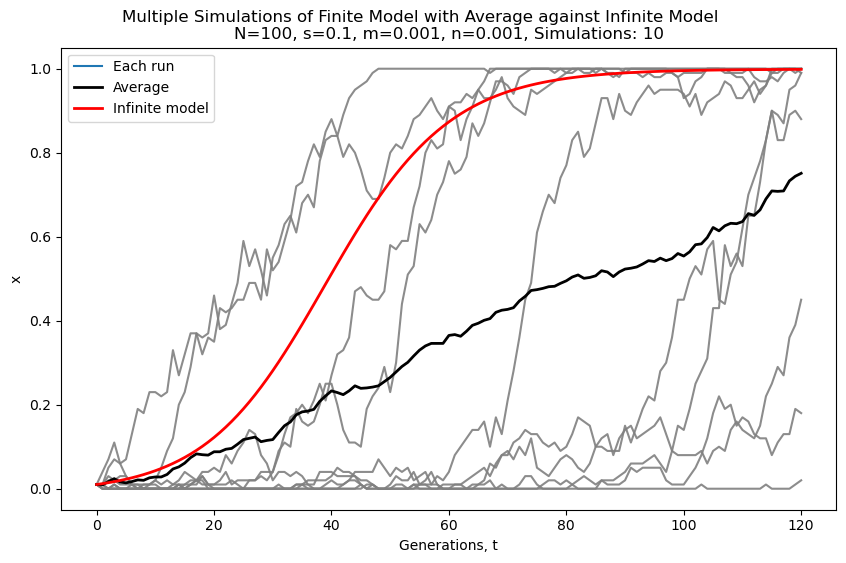
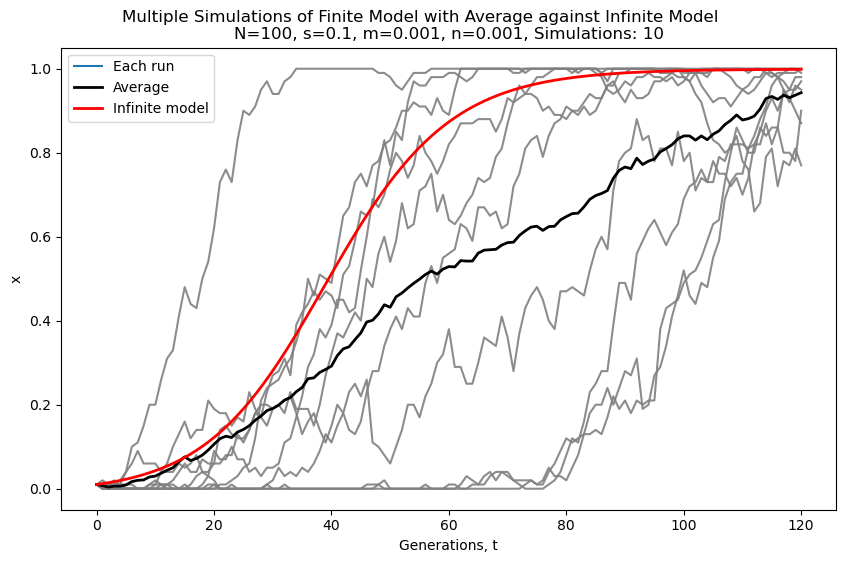
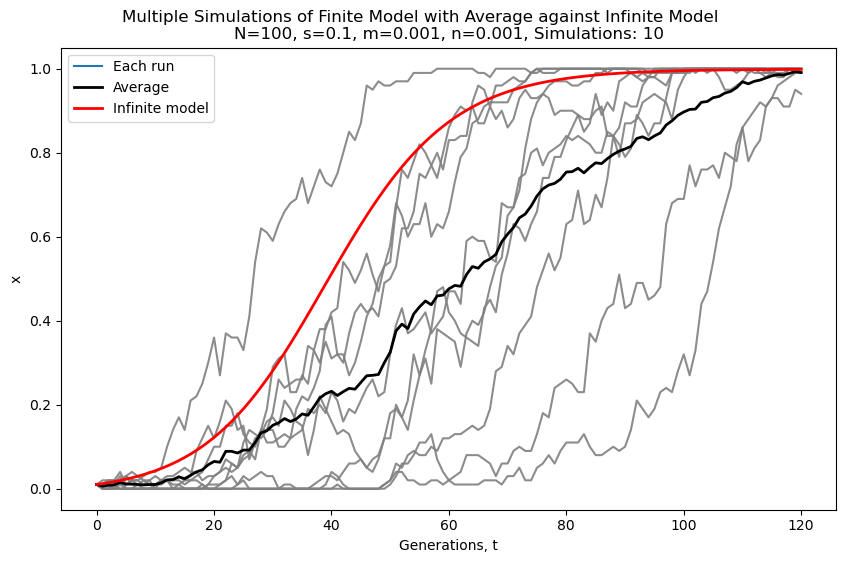

3 Runs at 1,000 simulations: 

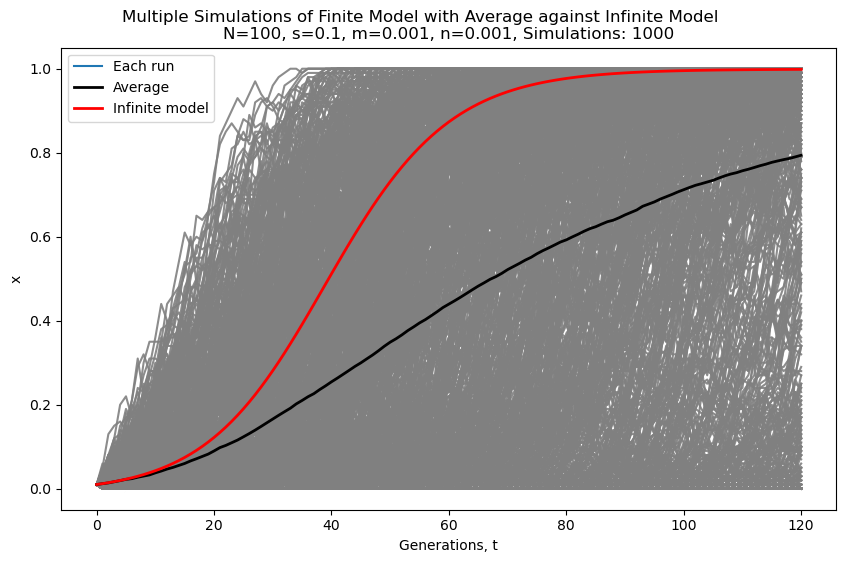
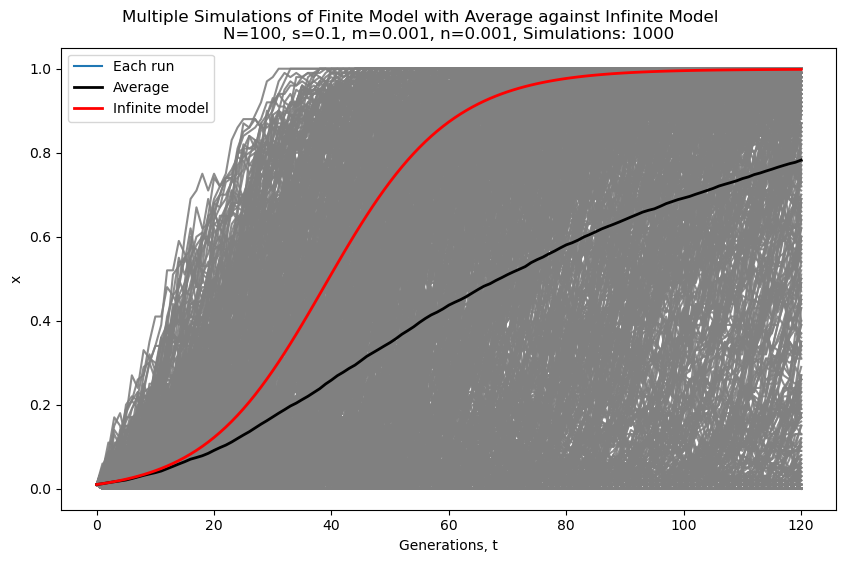
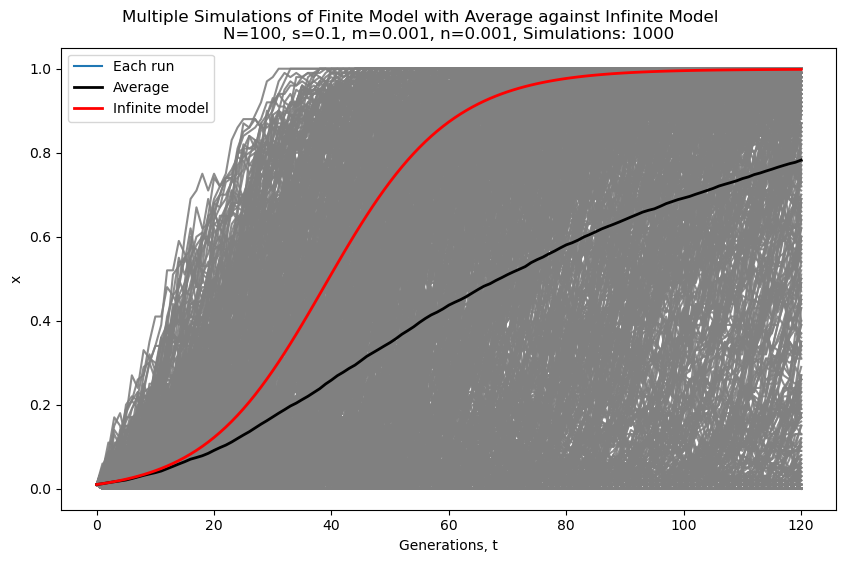

The average take-over time over 1000 runs is: 75.96516690856313 generations


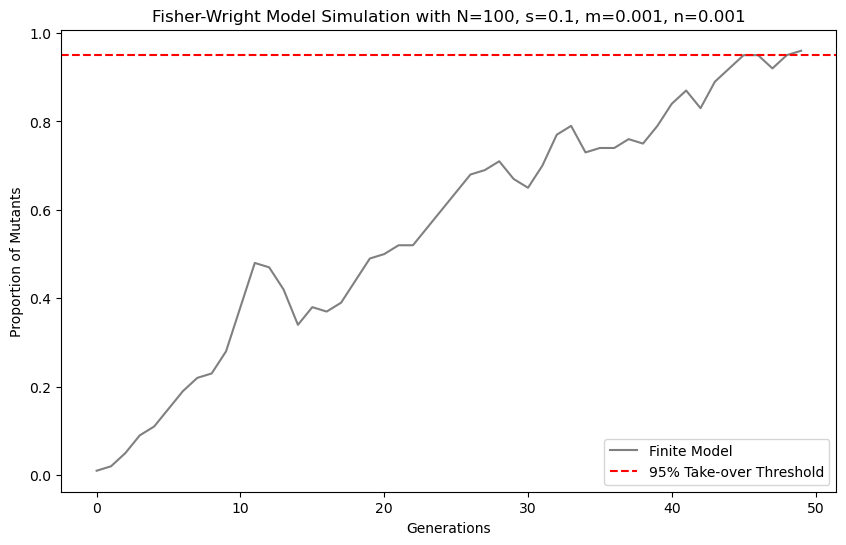

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the function for the finite Fisher-Wright model with asexual reproduction
def fisher_wright_finite(N, x, s, m, n, T):
    # Initialize the array to store the number of mutants at each time step
    mut_arr = np.zeros(T+1, dtype=int)
    mut_arr[0] = x  # Set the initial number of mutants
    
    # Simulate the Fisher Wright Model over T generations
    for t in range(1, T + 1):
        # Calculate the probability of selection and mutation
        psm = (1 - n) * (1 + s) * x / (N + s * x) + m * (N - x) / (N + s * x)
        
        # Update the number of mutants using binomial sampling
        x = np.random.binomial(N, psm)
        
        # Store the number of mutants for this generation
        mut_arr[t] = x
        
        # Check if the mutants have taken over more than 95% of the population
        if x / N > 0.95:
            # Return the current generation number as the take-over time
            return t, mut_arr[:t+1]
    
    # If take-over hasn't occurred within T generations, return None and the full array
    return None, mut_arr

# Parameters
N = 100  # Population size
s = 0.1  # Selective advantage
m = 0.001  # Mutation rate
n = 0.001  # Normalization probability
T = 120  # Number of generations
initial_mutants = 1  # Starting number of mutants

# Running the simulation multiple times
num_runs = 1000
takeover_times = []

for _ in range(num_runs):
    takeover_time, _ = fisher_wright_finite(N, initial_mutants, s, m, n, T)
    if takeover_time is not None:
        takeover_times.append(takeover_time)

# Calculate the average take-over time
average_takeover_time = np.mean(takeover_times) if takeover_times else None

# Print the average take-over time
print(f"The average take-over time over {num_runs} runs is: {average_takeover_time} generations")

# Now let's plot the results for one of the simulations
_, mut_arr = fisher_wright_finite(N, initial_mutants, s, m, n, T)

plt.figure(figsize=(10, 6))
plt.plot(mut_arr/N, label='Finite Model', color='grey')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Take-over Threshold')
plt.title(f'Fisher-Wright Model Simulation with N={N}, s={s}, m={m}, n={n}')
plt.xlabel('Generations')
plt.ylabel('Proportion of Mutants')
plt.legend()
plt.show()


## Part 2

In [7]:
import numpy as np
import scipy.special

# Parameters for the simulation
N = 1000  # Total population size
s = 0.01  # Selective advantage
m = n = 0.001  # Migration and natural death rate

# Function to calculate p_sm given x
def calculate_psm(x, N, s, m, n):
    return ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)

# Adjust the function to ensure each column sums to 1
def compute_column_normalized_transition_matrix(N, s, m, n):
    W = np.zeros((N+1, N+1))
    for x in range(N+1):
        for x_prime in range(N+1):
            psm = calculate_psm(x, N, s, m, n)
            W[x, x_prime] = scipy.special.comb(N, x_prime) * (psm ** x_prime) * ((1 - psm) ** (N - x_prime))
    # Normalize each column to sum to 1
    W /= np.sum(W, axis=0)
    return W

# Compute the column-normalized transition matrix W
W_column_normalized = compute_column_normalized_transition_matrix(N, s, m, n)

# Check that all columns sum to 1
column_sums_column_normalized = W_column_normalized.sum(axis=0)
column_sums_correct_column_normalized = np.allclose(column_sums_column_normalized, np.ones(N+1))

W_column_normalized, column_sums_correct_column_normalized



(array([[0.63580313, 0.40274289, 0.18630499, ..., 0.        , 0.        ,
         0.        ],
        [0.2316901 , 0.2949907 , 0.27428404, ..., 0.        , 0.        ,
         0.        ],
        [0.08434475, 0.16145828, 0.22571163, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.22449858, 0.16319443,
         0.08675748],
        [0.        , 0.        , 0.        , ..., 0.26922209, 0.29326584,
         0.23362653],
        [0.        , 0.        , 0.        , ..., 0.18287028, 0.39643152,
         0.62849685]]),
 True)

In [8]:
def generate_markov_distribution(W, initial_distribution, T):

    # Initialize the list of distributions with the initial distribution
    distributions = [initial_distribution]
    
    # Iterate over the number of time steps
    for t in range(1, T+1):
        # Compute the next distribution
        next_distribution = W @ distributions[-1]
        # Append the distribution for this time step to the list
        distributions.append(next_distribution)
        
    return distributions

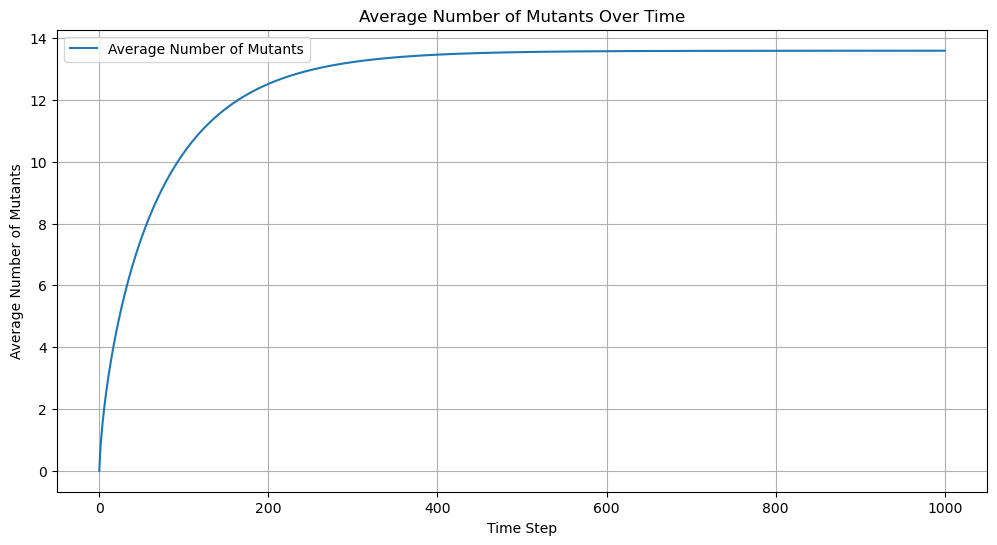

In [9]:
# Demonstrate the use of the `generate_markov_distribution` function with N=1000, s=0.01, m=n=0.001, and T=1000
N = 1000  # Adjusted total population size
s = 0.01  # Adjusted selective advantage
m = n = 0.001  # Adjusted migration and natural death rate
T = 1000  # Adjusted number of time steps

# Recompute the transition matrix with the new parameters
W_new = compute_column_normalized_transition_matrix(N, s, m, n)

# Define the initial distribution (assuming we start with no mutants)
initial_distribution = np.zeros(N+1)
initial_distribution[0] = 1

# Generate the Markov distributions using the new transition matrix and initial distribution
markov_distributions = generate_markov_distribution(W_new, initial_distribution, T)

# Calculate the average number of mutants at each time step
average_mutants = np.array([np.dot(np.arange(N+1), dist) for dist in markov_distributions])

# Plot the average number of mutants over time
plt.figure(figsize=(12, 6))
plt.plot(range(T+1), average_mutants, label='Average Number of Mutants')
plt.title('Average Number of Mutants Over Time')
plt.xlabel('Time Step')
plt.ylabel('Average Number of Mutants')
plt.legend()
plt.grid(True)
plt.show()


## Part 3

In [11]:
## Parameters
#N = 100  # Number of individuals
#L = 10   # Number of genes in the genome
#
## Initialize a population with N individuals, each having a genome with L binary values.
## We'll use a 2D numpy array where each row represents an individual's genome.
#population = np.zeros((N, L), dtype=int)
#
#
## Selective advantage per mutated gene
#s = 0.1
#
## Calculate fitness for each individual. 
## Fitness is 1 for no mutations, and (1 + s) for each mutated gene.
#fitness = 1 + s * population.sum(axis=1)
#
## Calculate selection probabilities for each individual.
## It is proportional to fitness, so we divide by the total fitness to get probabilities.
#total_fitness = fitness.sum()
#selection_probabilities = fitness / total_fitness
#
#
## Mutation rate
#m = 0.01
#
## Initialize a new generation with the same shape as the original population
#new_generation = np.zeros_like(population)
#
## For each individual in the new generation
#for i in range(N):
#    # Select a parent for this individual based on selection probabilities
#    parent_index = np.random.choice(N, p=selection_probabilities)
#    parent_genome = population[parent_index]
#    
#    # Copy the parent genome to the new generation with potential mutations
#    # Each gene has a probability m of flipping its state
#    mutation_mask = np.random.rand(L) < m
#    new_generation[i] = np.bitwise_xor(parent_genome, mutation_mask.astype(int))
#
## The new_generation now represents the population after one round of reproduction and mutation
#
#
## Calculate the average number of mutations per gene across the whole population
#average_mutations_per_gene = new_generation.mean(axis=0)
#
## This gives us an array of length L where each entry is the average number
## of mutations for the corresponding gene across all individuals in the new generation.


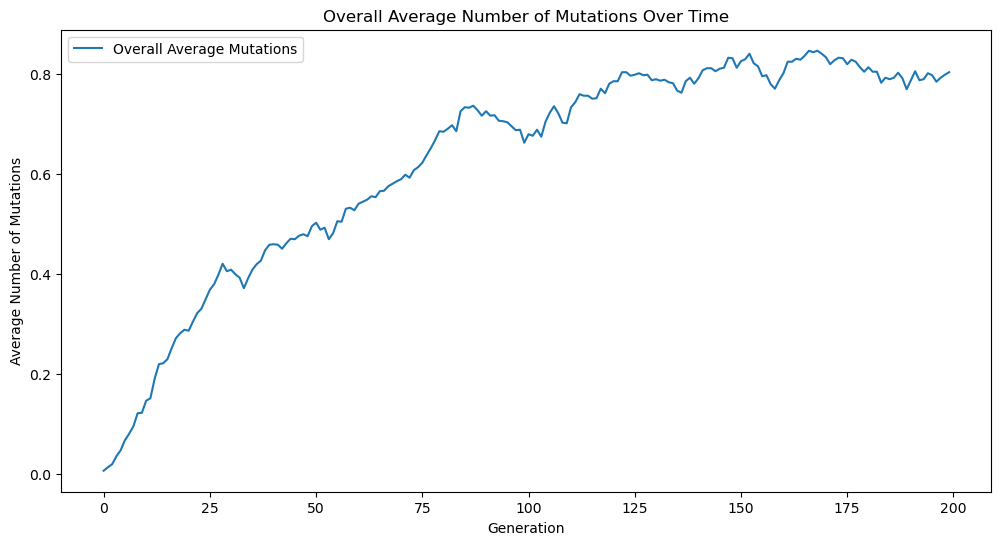

In [15]:
# Parameters
N = 100  # Number of individuals
L = 10   # Number of genes in the genome

# Selective advantage per mutated gene
s = 0.1


# Mutation rate
m = 0.01

# Parameters for the simulation
number_of_generations = 200  # or any other number you wish to simulate



# Initialize population
population = np.zeros((N, L), dtype=int)

# Prepare a list to hold the average mutations per gene site for each generation
average_mutations_over_time = []

# Loop over each generation
for generation in range(number_of_generations):
    
    # Calculate fitness based on the current population
    fitness = 1 + s * population.sum(axis=1)

    # Calculate selection probabilities
    total_fitness = fitness.sum()
    selection_probabilities = fitness / total_fitness

    # Reproduce the population based on selection probabilities and apply mutation
    new_generation = np.zeros_like(population)
    for i in range(N):
        # Select a parent for this individual based on selection probabilities
        parent_index = np.random.choice(N, p=selection_probabilities)
        parent_genome = population[parent_index]
        # Mutations occur with probability m
        mutation_mask = np.random.rand(L) < m
        new_generation[i] = np.bitwise_xor(parent_genome, mutation_mask.astype(int))

    # Update the population with the new generation
    population = new_generation

    # Record the average number of mutations per gene site for this generation
    average_mutations_per_gene = population.mean(axis=0)
    average_mutations_over_time.append(average_mutations_per_gene)


import matplotlib.pyplot as plt

# Convert the list of arrays into a 2D NumPy array for easier plotting
average_mutations_over_time_array = np.array(average_mutations_over_time)

# Calculate the overall average mutation rate per generation
overall_average_mutations = np.mean(average_mutations_over_time_array, axis=1)

# Plot the overall average mutations over time
plt.figure(figsize=(12, 6))
plt.plot(overall_average_mutations, label='Overall Average Mutations')

plt.title('Overall Average Number of Mutations Over Time')
plt.xlabel('Generation')
plt.ylabel('Average Number of Mutations')
plt.legend()
plt.show()


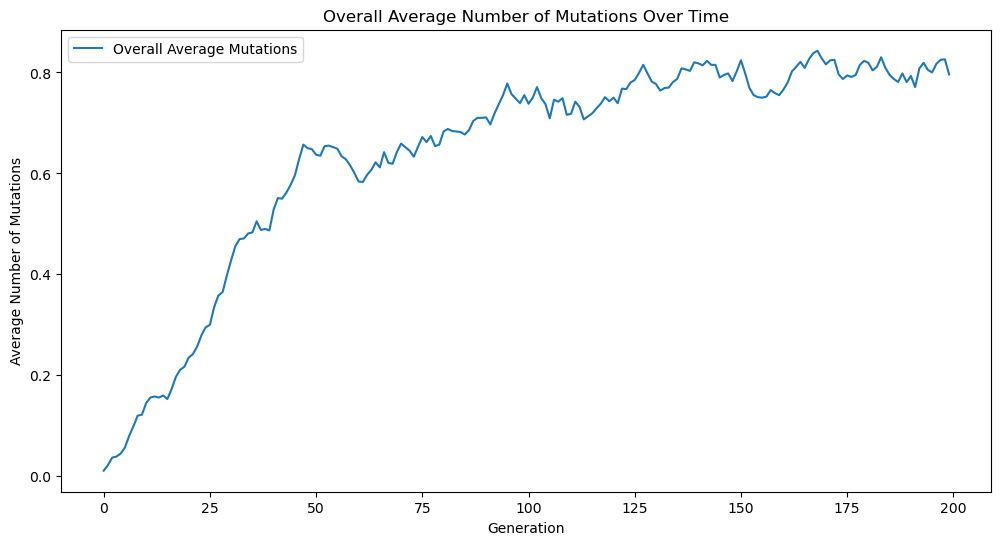

In [18]:
# Initialize population
population = np.zeros((N, L), dtype=int)

# Prepare a list to hold the average mutations per gene site for each generation
average_mutations_over_time = []

# Define the crossover and mutation function outside of your main loop
def perform_crossover_and_mutation(parent1, parent2, mutation_rate):
    # Perform uniform crossover
    mask = np.random.rand(L) < 0.5  # 50% chance to get gene from each parent
    offspring = np.where(mask, parent1, parent2)

    # Mutate offspring
    mutation_mask = np.random.rand(L) < mutation_rate
    offspring = np.bitwise_xor(offspring, mutation_mask.astype(int))
    return offspring


# Loop over each generation
for generation in range(number_of_generations):
    
    # Calculate fitness based on the current population
    fitness = 1 + s * population.sum(axis=1)

    # Calculate selection probabilities
    total_fitness = fitness.sum()
    selection_probabilities = fitness / total_fitness

    # Reproduction with crossover
    new_generation = np.zeros_like(population)
    for i in range(0, N, 2):  # We'll create two offspring at a time
        # Select parents based on fitness
        parent_indices = np.random.choice(N, size=2, p=selection_probabilities, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        # Create offspring with crossover and mutation
        new_generation[i] = perform_crossover_and_mutation(parent1, parent2, m)
        if i+1 < N:  # Check to avoid index out of bounds if N is odd
            new_generation[i+1] = perform_crossover_and_mutation(parent1, parent2, m)

    # Update the population with the new generation
    population = new_generation

    # Record the average number of mutations per gene site for this generation
    average_mutations_per_gene = population.mean(axis=0)
    average_mutations_over_time.append(average_mutations_per_gene)


import matplotlib.pyplot as plt

# Convert the list of arrays into a 2D NumPy array for easier plotting
average_mutations_over_time_array = np.array(average_mutations_over_time)

# Calculate the overall average mutation rate per generation
overall_average_mutations = np.mean(average_mutations_over_time_array, axis=1)

# Plot the overall average mutations over time
plt.figure(figsize=(12, 6))
plt.plot(overall_average_mutations, label='Overall Average Mutations')

plt.title('Overall Average Number of Mutations Over Time')
plt.xlabel('Generation')
plt.ylabel('Average Number of Mutations')
plt.legend()
plt.show()
